In [1]:
!nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2022 NVIDIA Corporation
Built on Wed_Sep_21_10:33:58_PDT_2022
Cuda compilation tools, release 11.8, V11.8.89
Build cuda_11.8.r11.8/compiler.31833905_0


In [2]:
!pip install easyocr

!pip install imutils

!pip install opencv -python-headless==4.1.2.30

!pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 55.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.0/146.0 kB 13.6 MB/s eta 0:00:00

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: -p
Looking in indexes: https://download.pytorch.org/whl/cu118


In [3]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

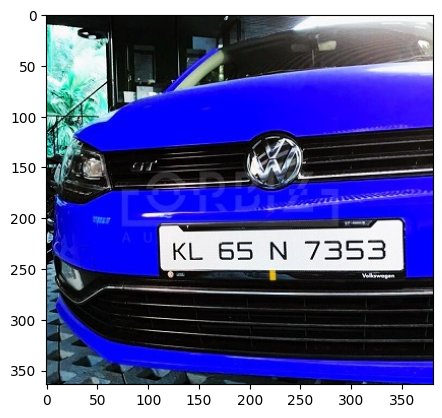

In [37]:
img=cv2.imread('/content/car5.jpg')
grayimg=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(cv2.cvtColor(grayimg,cv2.COLOR_BGR2RGB))

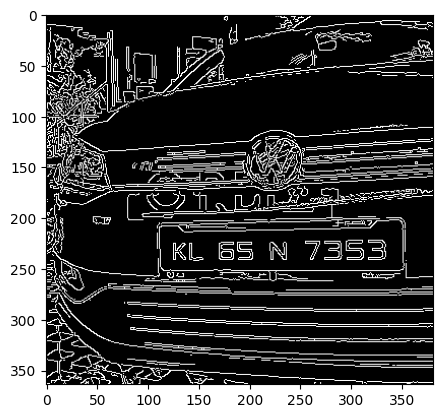

In [38]:
bfilter=cv2.bilateralFilter(grayimg,11,17,17)
edged=cv2.Canny(bfilter,30,200)
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [39]:
keypoints =cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [40]:
location=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,10,True)
  if len(approx)==4:
      location=approx
      break

In [41]:
location

array([[[351, 207]],

       [[348, 252]],

       [[112, 248]],

       [[114, 208]]], dtype=int32)

In [42]:
mask=np.zeros(grayimg.shape[:2],np.uint8)
mask
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img, img, mask=mask)

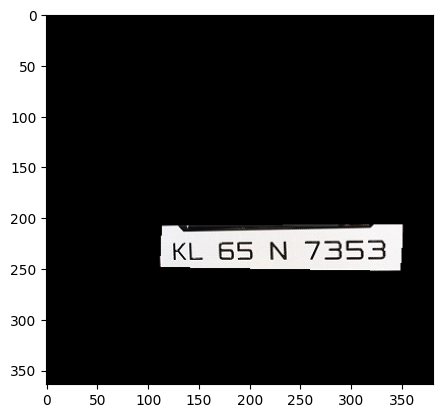

In [43]:
plt.imshow(cv2.cvtColor(new_image,cv2.COLOR_BGR2RGB))

In [44]:
 (x,y)=np.where(mask==255)
 (x1,y1)=(np.min(x),np.min(y))
 (x2,y2)=(np.max(x),np.max(y))
 croped_img=grayimg[x1:x2+1,y1:y2+1]

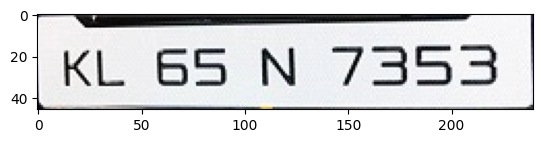

In [45]:
plt.imshow(cv2.cvtColor(croped_img, cv2.COLOR_BGR2RGB))

In [46]:
 reader=easyocr.Reader(['en'])
 result=reader.readtext(croped_img)
 print(result)

[([[7, 8], [229, 8], [229, 44], [7, 44]], 'KL 65 N 7353', 0.49052975079707783)]


In [47]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res =  cv2.putText(img, text=text, org=(00,190), fontFace=font, fontScale=1, color=(0,255,0),thickness=2)
res =  cv2.rectangle(img,tuple(approx[0][0]), tuple(approx[2][0]),( 0,255,0),3)


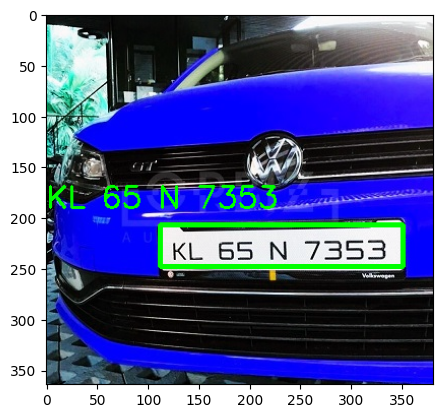

In [48]:
#plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
plt.imshow(res)

In [49]:
print(result)

[([[7, 8], [229, 8], [229, 44], [7, 44]], 'KL 65 N 7353', 0.49052975079707783)]
